In [78]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [79]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree1 = tree.DecisionTreeClassifier()  
tree1.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


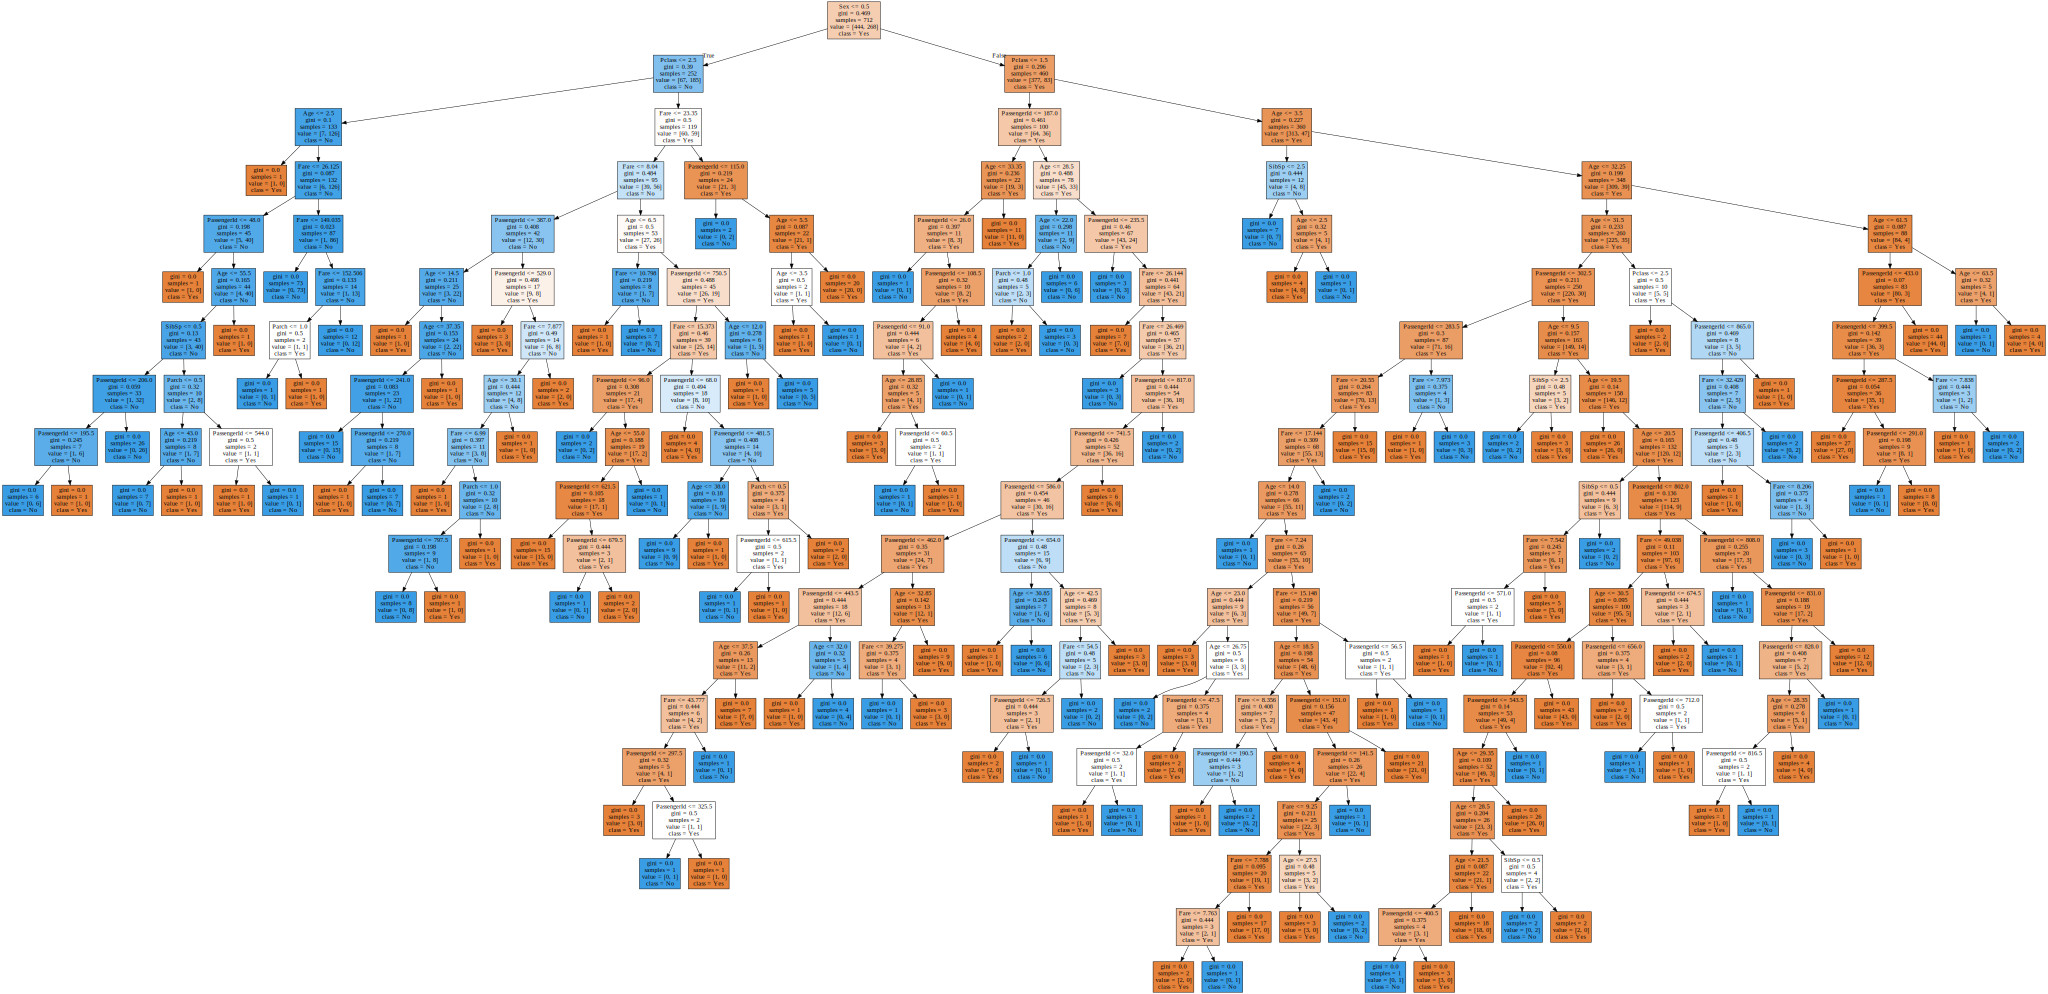

In [85]:
import graphviz
dot_data = tree.export_graphviz(tree1,out_file=None,
                               feature_names=x.columns,
                               class_names=["Yes","No"],
                               filled=True)
graph=graphviz.Source(dot_data)
graph.render("tree")
graph

In [ ]:
#the resultant tree is unpruned, all the recors of the leaf nodes don't belong to the same class.

In [81]:
dtree = tree.DecisionTreeClassifier(criterion="gini", splitter='random', max_depth=3)  
dtree.fit(x_train, y_train)   #fitting our model
y_pred=tree1.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.776536312849162


In [82]:
# using Decision Tree Pruning we augmented the accuracy 

In [83]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8268156424581006


In [84]:
# random forest algorithm has a better score than Decision trees even when using the pruning technique